# statistical thinking in python

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1 Graphical exploratory data analysis
you can observe a lot by looking at data  

EDA: the process of organizing, plotting, and summarizing a data set  

“Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone.”
—John Tukey

###  1.1 plotting a histogram

In [ ]:
# 一堆投票数据(discrete)很难看出什么结论，plot a histogram

    # matplotlib style
import matplotlib.pyplot as plt

_ = plt.hist(df_swing['dem_share'])  # can take in series and np.array

_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')

plt.show()


     # seaborn style
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  # Set default Seaborn style

_ = plt.hist(versicolor_petal_length)

plt.show()


In [ ]:
# Setting the bins of a histogram
bin_edges = [0, 10, 20, 30, 40, 50,
             60, 70, 80, 90, 100]

    # one way: set every bin edges
_ = plt.hist(df_swing['dem_share'], bins=bin_edges)
    
    # another: set num of bins
_ = plt.hist(df_swing['dem_share'], bins=20)

### 1.2 (to avoid binning bias) plotting all of your data
把每个数据点都画出来)

In [ ]:
_ = sns.swarmplot(data=df, x='species', y='petal length (cm)')
    # x轴是个categorical var,
    # 这个图相当于画了n个histogram, n=data.species.nunique()
    
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

plt.show()

### 1.3 (当数据点多到密恐时) Plot all of your data:ECDFs
ECDF: Empirical cumulative distribution function   
it plots all the data and show their distribution in a consice way

In [14]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)  # Number of data points: n

    x = np.sort(data)    # 从小到大把series of interest排序

    y = np.arange(1, n + 1) / n   # 生成一系列normed编号

    return x, y  # 作为画图的横纵坐标

In [ ]:
# 画单个seires/np.array的ECDF
x_vers, y_vers = ecdf(versicolor_petal_length)

_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

plt.margins(0.02)  # Make the margins nice

_ = plt.ylabel('ECDF')
_ = plt.xlabel('petal lengths of Iris versicolor flowers(cm)')

plt.show()

In [ ]:
# 画多个ECDF在一张图上，matplotlib自动用不同颜色区分
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

    # Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

    # Make nice margins
plt.margins(0.02)   

    # Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

plt.show()

## 2 Quantitative exploratory data analysis
用几个数字来总结data

### 2.1 sample mean and median

In [ ]:
import numpy as np

np.mean(data)

np.median(data)

### 2.2 percentile, outliers, and boxplot  
median是特殊的percentile  
boxplot is one of the alternatives of bee swarmplot

In [ ]:
# plot several percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

ptiles_vers = np.percentile(versicolor_petal_length, percentiles)  # 注意percentile不是fraction

print(ptiles_vers)

In [ ]:
# 在ECDF上叠加percentile点
_ = plt.plot(x_vers, y_vers, '.')
plt.margins(0.02)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')   # Overlay percentiles as red diamonds.

plt.show()

In [ ]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal length (cm)', data=df)

_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

plt.show()

### 2.3 Variance and standard deviation
（就单个sample来说，而不是在推断Population params的语境里）

In [ ]:
np.var(data)

np.std(data)

### 2.4 Covariance and Pearson correlation coefficient

![](http://upload-images.jianshu.io/upload_images/1526845-d4c49911586344d6.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

in order to be dimensionless:  
![](http://upload-images.jianshu.io/upload_images/1526845-9c437813a915633b.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

In [ ]:
# computing the covariance
    # Compute the covariance matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

print(covariance_matrix)  # get a 2*2 matrix

    # Extract covariance of length and width of petals
petal_cov = covariance_matrix[0, 1]  

print(petal_cov)


In [ ]:
# compute teh Pearson correlation coefficient
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)


## 3 Thinking probabilistically-- Discrete variables 
test & measurement -->> outcome  
another test & measurement  -->> what is the outcome likely to be?  

Hacker statistics：  
Uses simulated repeated measurements to compute probabilities.

### 3.1 Random number generators and hacker statistics

The np.random module
* Suite of functions based on random number generation
* np.random.random():
    * draw a number between 0 and 1
    * 在0-1区间内任意一个值取值的概率均等

In [7]:
# Bernoulli trial： 
# An experiment that has two options, 
# "success" (True) and "failure" (False).

# 一次伯努利实验of size n

def perform_bernoulli_trials(n, p):
    """
    Perform n Bernoulli trials with success probability p
    and return number of successes.
    """
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success


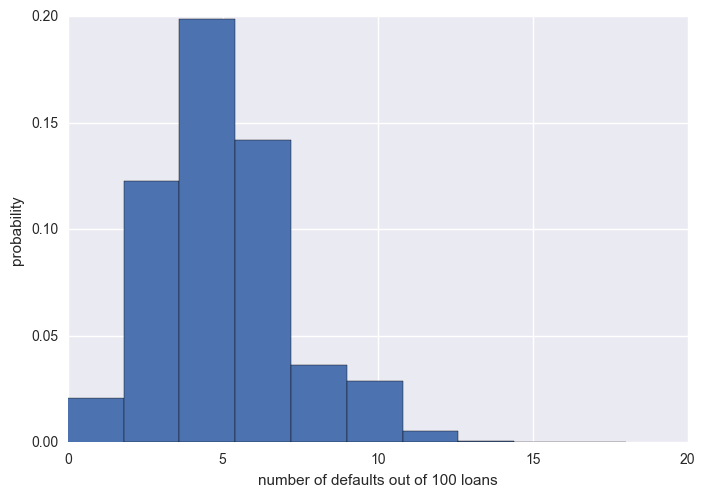

In [12]:
# N次（伯努利实验of size n）
N = 1000000

n_defaults = np.empty(N)   # Initialize the container array

    # Compute the number of defaults
for i in range(N):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


    # Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

    # Show the plot
plt.show()


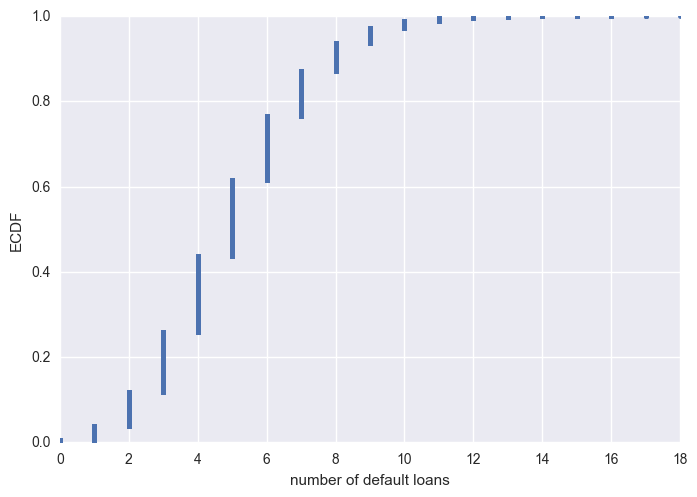

Probability of losing money = 0.028176


In [15]:
# ECDF of (N次（伯努利实验of size n）)

    # Compute ECDF: x, y
x, y = ecdf(n_defaults)

    # Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of default loans')
_ = plt.ylabel('ECDF')

    # Show the plot
plt.show()

    # Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = sum(n_defaults >= 10)

    # Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


### 3.2 Probability distributions and stories: The Binomial distribution  
Binomial distribution: the story  
* The number r of successes in n Bernoulli trials with probability p of success, is Binomially distributed
* eg. The number r of heads in 4 coin flips with probability 0.5 of heads, is Binomially distributed

In [ ]:
# 其实就是上一节的东西封装到np.random.binomial里
# 当然，代码要有效率得多

    # Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

    # Compute CDF: x, y
x, y = ecdf(n_defaults)

    # Plot the CDF with axis labels
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of success')
_ = plt.ylabel('cdf')

    # Show the plot
plt.show()


### 3.3 Poisson processes and the Poisson distribution  
Poisson process：  
* The timing of the next event is completely independent of when the previous event happened  

Poisson distribution：  
* The number r of arrivals of a Poisson process in a given time interval with average rate of λ arrivals per interval is Poisson distributed.
* eg. The number r of hits on a website in one hour with an average hit rate of 6 hits per hour is Poisson distributed.  
* （这点没有理解）Poisson Dis. 是Binomial Dis.的一种特殊情况。Binomial distribution for low probability of success and large number of trials. That is, for rare events.

In [16]:
# 同样均值的一个poisson dis.和多个binomial dis. with diff p，
# binomial dis. 的p越小，binomial dis. 的std越接近poisson dis. 的std


# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      10.012 3.15313431366
n = 20 Binom: 10.0021 2.25146520959
n = 100 Binom: 9.9594 2.97579428725
n = 1000 Binom: 9.9844 3.14826247953


## 4 Thinking probabilistically-- Continuous variables 

### 4.1 Probability density functions
* Continuous analog to the PMF
* Mathematical description of the relative likelihood of observing a value of a continuous variable

### 4.2 Introduction to the Normal distribution
* Describes a continuous variable whose PDF has a single symmetric peak.  
* 看一个data是不是normal dis.可以用它的CDF和（用np.random.normal生成的一个size很大的）CDF比较

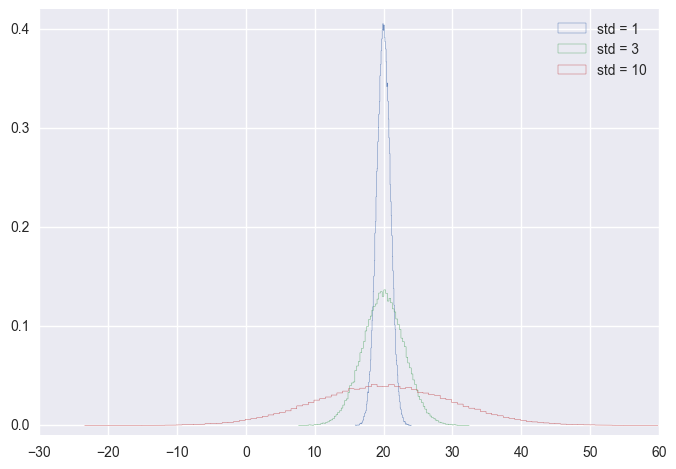

In [17]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, 100000)
samples_std3 = np.random.normal(20, 3, 100000)
samples_std10 = np.random.normal(20, 10, 100000)



# Make histograms
plt.hist(samples_std1, normed=True, histtype='step', bins=100)
plt.hist(samples_std3, normed=True, histtype='step', bins=100)
plt.hist(samples_std10, normed=True, histtype='step', bins=100)



# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


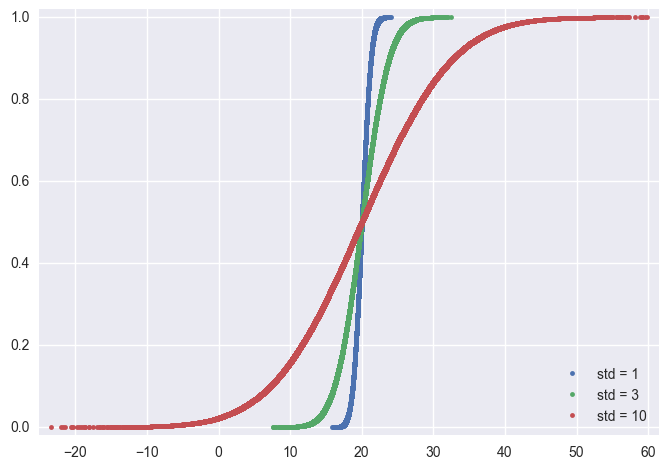

In [18]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


### 4.3 The Normal distribution: Properties and warnings  
* 无处不在
    * in practice, used to describe most symmetric data you will encounter
    * many stats process require normality assumption
* 可能误用，caveat(warnings)
    * 看着像正态分布其实不是 —— check with ECDF
    * normal dis.微乎其微的概率产生outlier(eg. 4 stdev away from mean)  
    -->> 有outlier的数据可能不适合套用normal dis. to modeling

In [ ]:
# check normality with ECDF

    # Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

    # Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

    # Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

    # Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


### 4.4 The Exponential distribution
* The waiting time between arrivals of a Poisson process is Exponentially distributed
* single param: the mean

In [ ]:
# check exponentiality with ECDF
mean = np.mean(data)

samples = np.random.exponential(mean, size = 100000)

x, y = ecdf(inter_times)

x_theor, y_theor = ecdf(samples)

_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor, marker='.', linestyle='none')

_ = plt.xlabel('xlabel')
_ = plt.ylabel('ylabel')

plt.show()